Chose data to use->
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000s

2


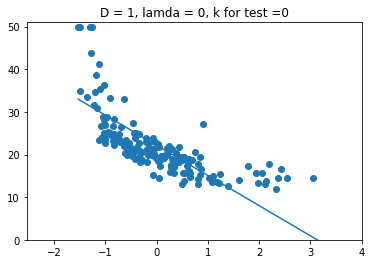

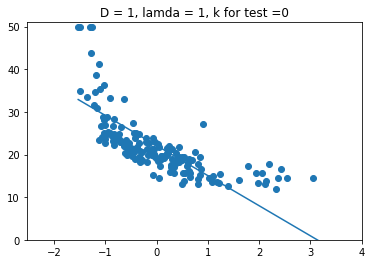

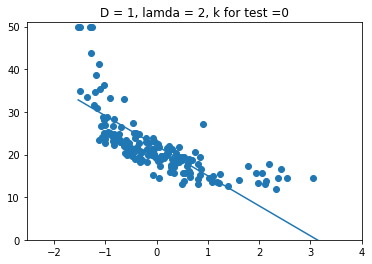

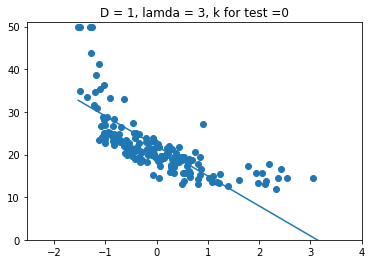

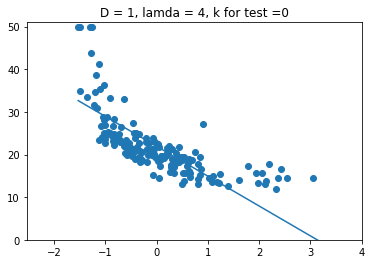

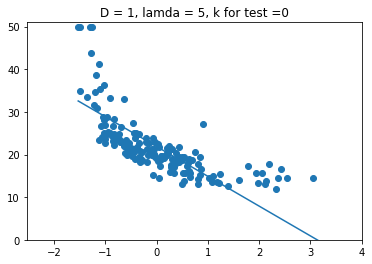

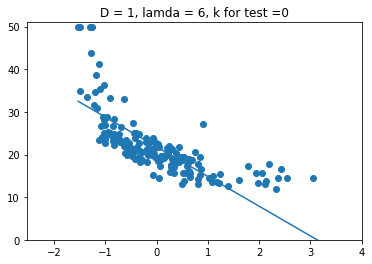

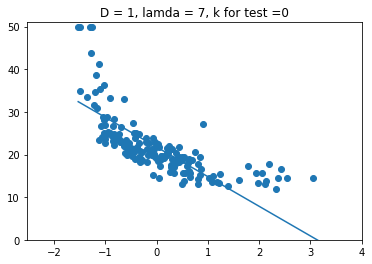

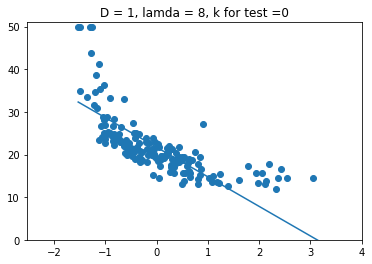

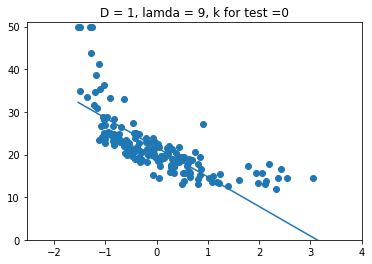

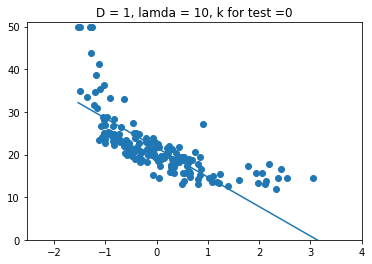

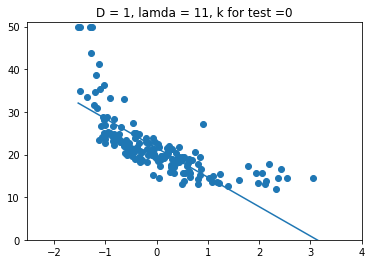

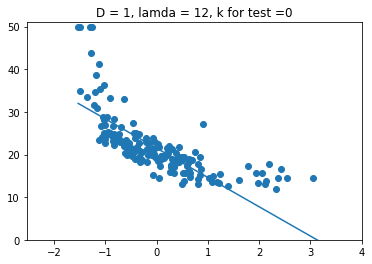

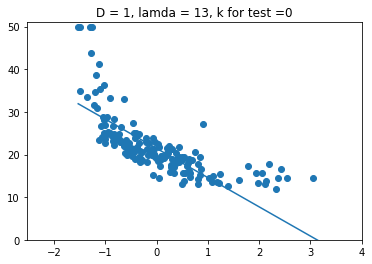

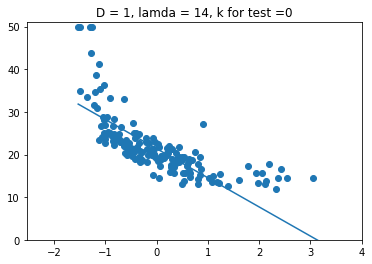

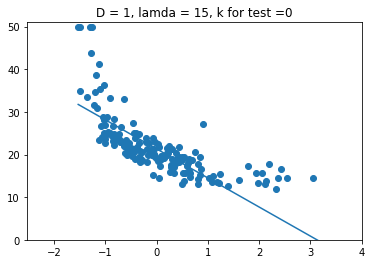

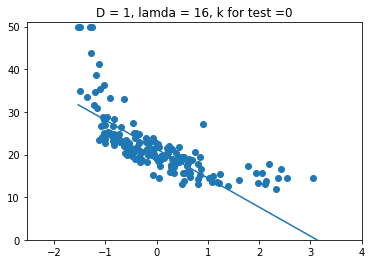

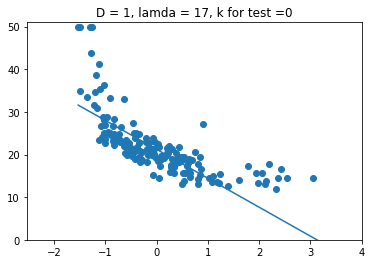

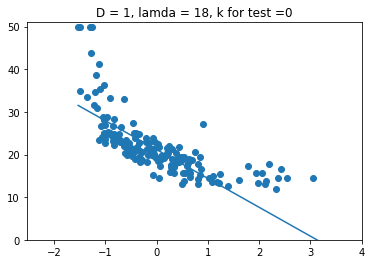

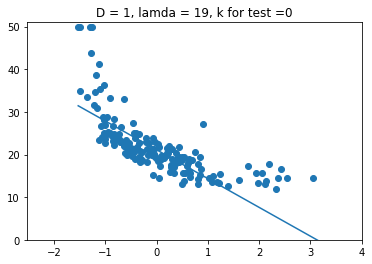

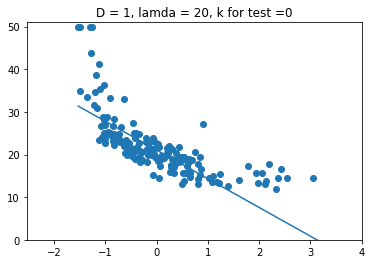

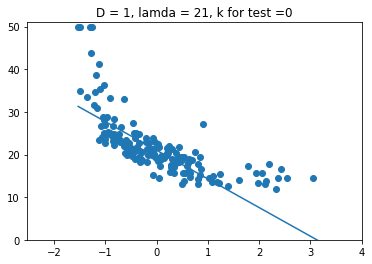

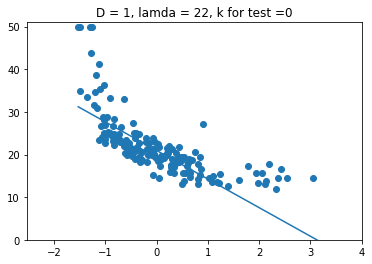

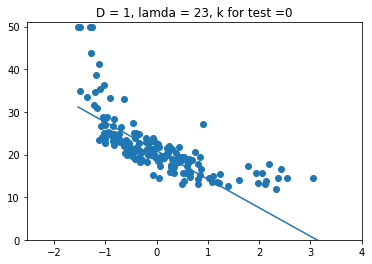

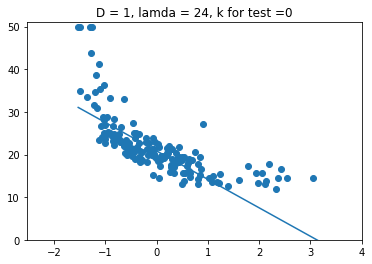

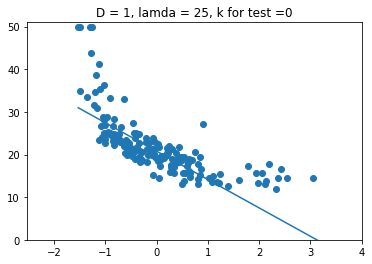

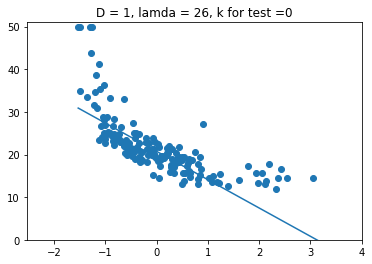

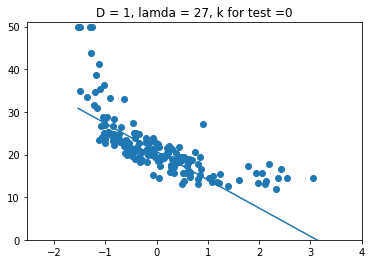

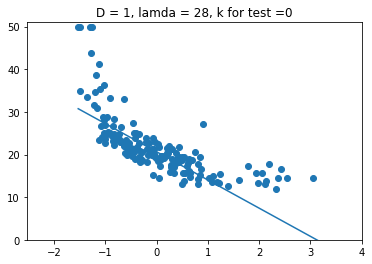

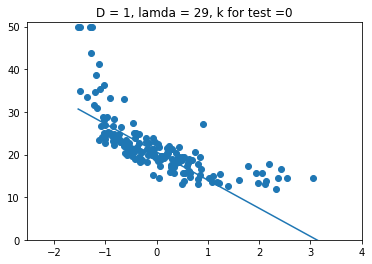

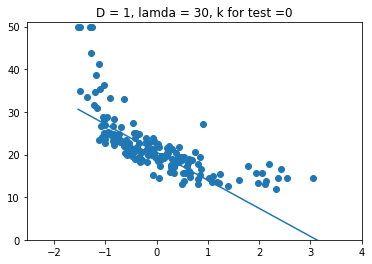

2


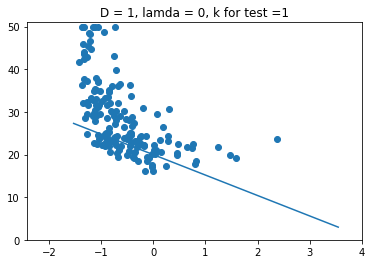

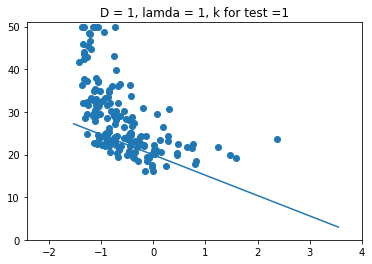

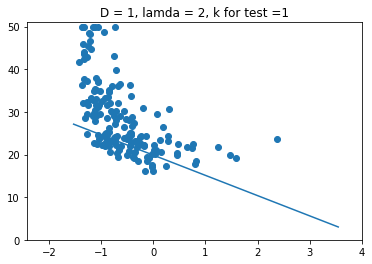

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd



dframe = pd.read_csv('housing_data.csv', sep='\s+', header = None)
array_data= dframe.as_matrix()
array_data_x = np.array([])
array_data_t = np.array([])
text = (
'1. CRIM: per capita crime rate by town\n'
'2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.\n'
'3. INDUS: proportion of non-retail business acres per town\n'
'4. CHAS: Charles River dummy variable\n'
'5. NOX: nitric oxides concentration (parts per 10 million) \n'
'6. RM: average number of rooms per dwelling \n'
'7. AGE: proportion of owner-occupied units built prior to 1940 \n'
'8. DIS: weighted distances to five Boston employment centres \n'
'9. RAD: index of accessibility to radial highways \n'
'10. TAX: full-value property-tax rate per $10,000 \n'
'11. PTRATIO: pupil-teacher ratio by town \n'
'12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town \n'
'13. LSTAT: % lower status of the population \n'
'14. MEDV: Median value of owner-occupied homes in $1000s\n'
)
print('Chose data to use->')
print(text)

for row in array_data:
    array_data_x = np.append(array_data_x,row[12])
    array_data_t = np.append(array_data_t,row[13])

array_data_x = array_data_x.reshape((-1,1))
array_data_t = array_data_t.reshape((-1,1))

def flatten(L):
    if isinstance(L, list):
        if L == []:
            return []
        else:
            return flatten(L[0]) + flatten(L[1:])
    else:
        return [L]


#データを分けるメソッド
def split_list (list,n):
    list_size = len(list)
    a = list_size // n
    b = list_size % n
    return [list[i*a + (i if i < b else b):(i+1)*a + (i+1 if i < b else b)] for i in range(n)]

#次元d からd次元のwを作る
def prepare_w(d):
    return np.zeros(d)

#xとwの内積を計算
def calc_X(x,w):
    return np.dot(w, x)

#最少２乗法
def least_squares(x,t): 
    return np.array(0.5 * (x - t)**2)

#傾き計算
def gradient(x,y,t):
    gradient = calc_X(x,y-t)
    return gradient

def gradient_l2_wL(x,y,t,w,L):
    gradient = calc_X(x,y-t) + w*L
    return gradient

#勾配降下法
def gradient_decent(init_w, x, init_y, t, lr, step_num, L):
    step_ls = np.array([])
    step_i = np.array([])
    w = init_w
    y = init_y
    for i in range(step_num):
        y = calc_X(w,x)
        grad = gradient_l2_wL(x, y, t ,w, L)
        w =w - lr *grad
    return w

def cal_ls(w,x, t):
    y = calc_X(w,x)    
    ls = np.sum(least_squares(y,t))    
    return ls

#データの何割を学習に用いるか
#p=0.9
#num_train = int(len(array_data_x)*p)

#データを何分割するか
num_split = 3

#n次方程式を解く
n = [1,2,3,4]

#L２正規項のラムダを入れる
L_list = list(range(0,31))

#学習率の設定
lr =0.00001

#目標ベクトル
#t = t_train.reshape((1,-1))[0]

for m in n:
    ls_array = np.array([])
#仮のw
    array_w=np.zeros(m+1)

#xのnumpy配列
    array_x=np.array(array_data_x)
    std_array_x = zscore(array_x)
    std_array_x_list = np.array([])
    for x in std_array_x:
        for n in range(m+1):
            std_array_x_list = np.append(std_array_x_list,x**n)

    std_array_x_list = std_array_x_list.reshape(-1, m+1)


    for i in range(0,num_split):
        #テストデータと訓練データに分ける
        split_std_array_x = split_list(std_array_x, num_split)
        split_std_array_x_list = split_list(std_array_x_list, num_split)  
        t = array_data_t.reshape((1,-1))[0]
        split_t = split_list(t, num_split)

        only_x_test = split_std_array_x[i].reshape(1,-1)[0]
        only_t_test = split_t[i]

        x_test =  split_std_array_x_list.pop(i)
        t_test =  split_t.pop(i)     
        x_train_ori =  split_std_array_x_list
        t_train_ori =  split_t

        x_train,t_train = [],[]
        for x in x_train_ori:
            for a in x:
                x_train.append(a)

        for t in t_train_ori:
            for b in t:
                t_train.append(b)

        print(len(split_t))
#yのnumpy配列
        array_y = calc_X(array_w,x_train )

#y勾配降下法実行
        for L in L_list:

            learned_array_w = gradient_decent(array_w, x_train , array_y, t_train, lr ,1000, L)

#予測されたyを算出       

            ls = cal_ls(learned_array_w, x_test, t_test)
            ls_array = np.append(ls_array, ls)


#グラフ用
            x_for_graph = np.array([])
            x_for_graph = np.linspace( std_array_x.min(),  std_array_x.max(),100)
            x_list_for_graph = np.array([])

            for x in x_for_graph:
                for n in range(m+1):
                    x_list_for_graph = np.append(x_list_for_graph,x**n)

            x_list_for_graph = x_list_for_graph.reshape(-1, m+1)
            y_list_for_graph = calc_X(learned_array_w,x_list_for_graph)
            plt.plot(x_for_graph, y_list_for_graph)
            plt.scatter(only_x_test,only_t_test)
            plt.xlim([x_test.min()-1,4])
            plt.ylim([0,only_t_test.max()+1])
            plt.title('D = {}, lamda = {}, k for test ={}'.format(n,L,i))
#            グラフ表示
            plt.show()

    ls_array = ls_array.reshape(-1,len(L_list))
    ls_array_sum = np.sum(ls_array, axis = 0)

    for l in range(len(ls_array_sum)):
        print('D = {}の時はlamda = {}の場合に損失係数が{:.1f}になる'.format(n,l,ls_array_sum[l]))


In [71]:
ls_array_sum = np.sum(ls_array, axis = 0)
print(ls_array_sum)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
